In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
plt.style.use("dark_background")

df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
X_train, X_test, y_train, y_test = train_test_split(
    df[['age', 'fare']],
    df['survived'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((623, 2), (268, 2))

In [3]:
ort = X_train.mean().to_dict()
X_train.fillna(ort,inplace=True)
X_test.fillna(ort,inplace=True)

In [4]:
X_train

,age,fare
857,51.000000,26.5500
52,49.000000,76.7292
386,1.000000,46.9000
124,54.000000,77.2875
578,29.915339,14.4583
...,...,...
835,39.000000,83.1583
192,19.000000,7.8542
629,29.915339,7.7333
559,36.000000,17.4000


In [5]:
Age_disccretised, intervals = pd.qcut(
    X_train['age'], 5, labels=None, retbins=True, precision=3, duplicates='raise')

pd.concat([Age_disccretised, X_train['age']], axis=1).head(10)

,age,age
857,"(38.6, 80.0]",51.000000
52,"(38.6, 80.0]",49.000000
386,"(0.669, 21.0]",1.000000
124,"(38.6, 80.0]",54.000000
578,"(29.0, 29.915]",29.915339
549,"(0.669, 21.0]",8.000000
118,"(21.0, 29.0]",24.000000
12,"(0.669, 21.0]",20.000000
157,"(29.915, 38.6]",30.000000
127,"(21.0, 29.0]",24.000000


In [6]:
intervals

array([ 0.67      , 21.        , 29.        , 29.91533865, 38.6       ,
       80.        ])

In [7]:
Age_disccretised.value_counts()

age
(0.669, 21.0]     138
(38.6, 80.0]      125
(21.0, 29.0]      123
(29.0, 29.915]    121
(29.915, 38.6]    116
Name: count, dtype: int64

In [8]:
X_test["age_disc"] = pd.cut(x=X_test["age"],bins=intervals)
X_test.head()

,age,fare,age_disc
495,29.915339,14.4583,"(29.0, 29.915]"
648,29.915339,7.5500,"(29.0, 29.915]"
278,7.000000,29.1250,"(0.67, 21.0]"
31,29.915339,146.5208,"(29.0, 29.915]"
255,29.000000,15.2458,"(21.0, 29.0]"


<Axes: xlabel='age_disc'>

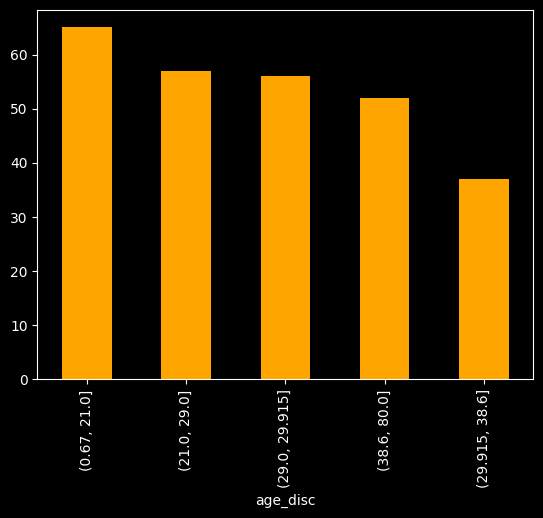

In [9]:
X_test["age_disc"].value_counts().plot.bar(color = "orange")

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    df[['age', 'fare']],
    df['survived'],
    test_size=0.3,
    random_state=0)
ort = X_train.mean().to_dict()
X_train.fillna(ort,inplace=True)
X_test.fillna(ort,inplace=True)

In [37]:
from sklearn.preprocessing import KBinsDiscretizer
disc = KBinsDiscretizer(n_bins=10,encode="ordinal",strategy="quantile").set_output(transform="pandas")
disc.fit(X_train[["age","fare"]])

c:\Users\oskar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


KBinsDiscretizer(encode='ordinal', n_bins=10)

In [38]:
disc.bin_edges_

array([array([ 0.67      , 16.        , 21.        , 24.        , 29.        ,
              29.91533865, 33.        , 38.6       , 47.        , 80.        ]),
       array([  0.     ,   7.72584,   7.88252,   8.05   ,  12.13   ,  15.     ,
               23.45   ,  27.75   ,  46.9    ,  77.17584, 512.3292 ])          ],
      dtype=object)

In [39]:
disc.transform(tes2[["age","fare"]])

,age,fare
495,8.0,4.0
648,5.0,0.0
278,0.0,7.0
31,5.0,9.0
255,4.0,5.0
...,...,...
263,7.0,0.0
718,5.0,5.0
620,3.0,4.0
786,1.0,0.0


In [21]:
train_t = disc.transform(X_train[["age","fare"]])
train_t

,age,fare
857,8.0,6.0
52,8.0,8.0
386,0.0,8.0
124,8.0,9.0
578,5.0,4.0
...,...,...
835,7.0,9.0
192,1.0,1.0
629,5.0,1.0
559,6.0,5.0


<Axes: xlabel='age'>

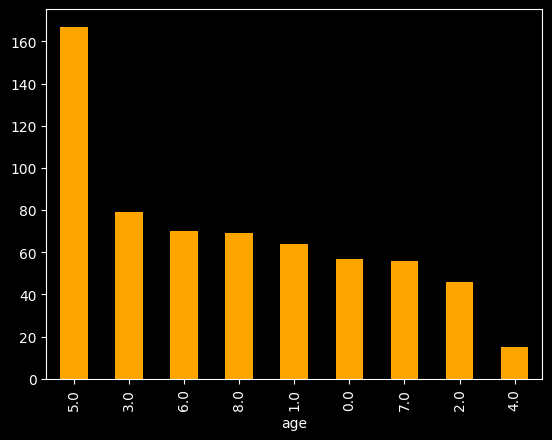

In [22]:
train_t.age.value_counts().plot.bar(color="orange")

<Axes: xlabel='fare'>

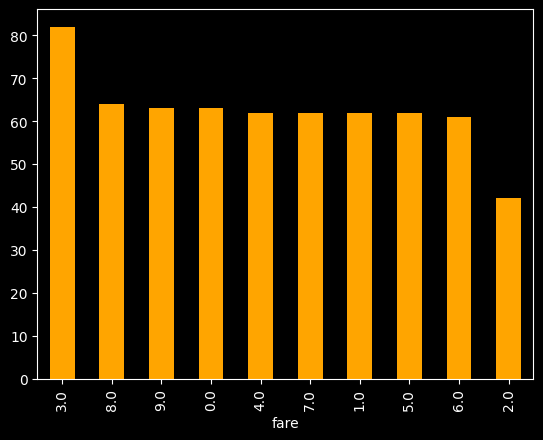

In [70]:
train_t.fare.value_counts().plot.bar(color="orange")

In [33]:
from feature_engine.discretisation import EqualFrequencyDiscretiser
disc = EqualFrequencyDiscretiser(q=10,variables=["age","fare"])
disc.fit(X_train)
disc.binner_dict_

{'age': [-inf,
  16.0,
  21.0,
  24.0,
  29.0,
  29.915338645418327,
  33.0,
  38.60000000000002,
  47.0,
  inf],
 'fare': [-inf,
  7.72584,
  7.88252,
  8.05,
  12.130000000000008,
  15.0,
  23.45,
  27.75,
  46.9,
  77.17584000000004,
  inf]}

<Axes: xlabel='age'>

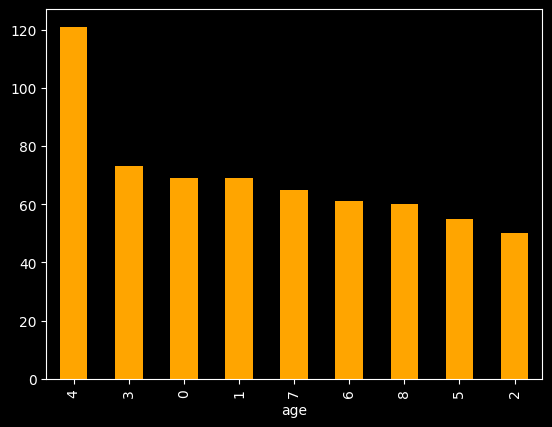

In [34]:
train_t = disc.transform(X_train)
train_t.age.value_counts().plot.bar(color="orange")

<Axes: xlabel='fare'>

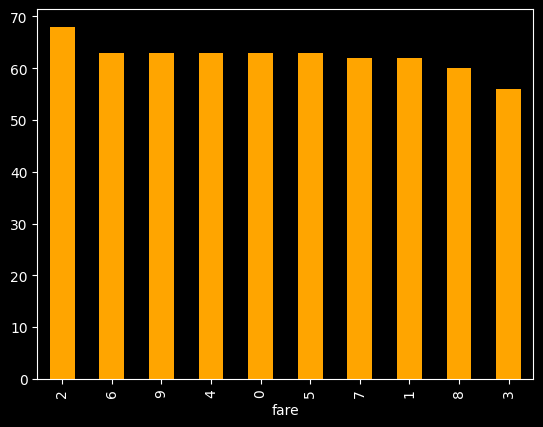

In [49]:
train_t.fare.value_counts().plot.bar(color="orange")

<Axes: >

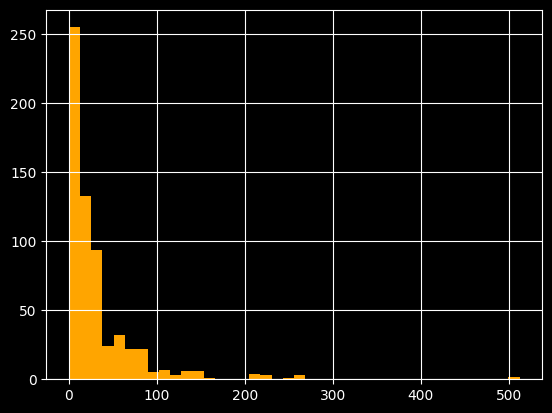

In [75]:
X_train.fare.hist(bins=40,color='orange')

In [50]:
Age_disccretised, intervals = pd.cut(
    X_train['age'], bins=5, labels=None, retbins=True,include_lowest=True)

pd.concat([Age_disccretised, X_train['age']], axis=1).head(10)

,age,age
857,"(48.268, 64.134]",51.000000
52,"(48.268, 64.134]",49.000000
386,"(0.59, 16.536]",1.000000
124,"(48.268, 64.134]",54.000000
578,"(16.536, 32.402]",29.915339
549,"(0.59, 16.536]",8.000000
118,"(16.536, 32.402]",24.000000
12,"(16.536, 32.402]",20.000000
157,"(16.536, 32.402]",30.000000
127,"(16.536, 32.402]",24.000000


In [51]:
intervals

array([ 0.59067, 16.536  , 32.402  , 48.268  , 64.134  , 80.     ])